# Homework 2
This notebook provides some skeleton code to get you started on the homework. Add in your own code and markdown cells to answer the homework questions. If you want to submit the notebook as a PDF, make sure your code and markdowns are clear and concise to make grading easy for the TAs.
This notebook can be opened in Colab Open In Colab

Before starting, select "Runtime->Factory reset runtime" to start with your directories and environment in the base state.

If you want to save changes to the notebook, select "File->Save a copy in Drive" from the top menu in Colab. This will save the notebook in your Google Drive.

**Note**: you should use a GPU or TPU for this assignment.  In the top left menu select Runtime->Change runtime type and choose any GPU or TPU.



# Clones, installs, and imports

## Clone GitHub Repository
This will clone the repository to your machine. This includes the code and data files. Then change into the directory of the repository.

In [1]:
!git clone https://github.com/zlisto/social_media_analytics

import os
os.chdir("social_media_analytics")

Cloning into 'social_media_analytics'...
remote: Enumerating objects: 680, done.
remote: Counting objects: 100% (245/245), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 680 (delta 126), reused 204 (delta 86), pack-reused 435
Receiving objects: 100% (680/680), 76.16 MiB | 15.46 MiB/s, done.
Resolving deltas: 100% (358/358), done.
Updating files: 100% (67/67), done.


## Import packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import gensim.downloader as api
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from transformers import RobertaTokenizer, RobertaModel
import torch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


import sklearn.cluster as cluster
from sklearn import metrics
from scipy import stats

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



import scripts.TextAnalysis as ta

#this code makes the default font sizes big in plots
plt.rcParams.update({'axes.labelsize': 18,
                     'xtick.labelsize': 14,
                     'ytick.labelsize': 14})


# Problem 1. Cluster a User's Tweets (57 points)

In this problem we are going to cluster the tweets of a single user.  Our goal is to determine different topics this person tweets about.  

The user is social media influencer Kim Kardashian, with screen name KimKardashian.

#### 1. (12 points) Load tweets

The tweets are in the file `"data/HW2.csv"`. Load the tweets into a dataframe `df`.  Remove all columns except `"screen_name"` and `"text"`.   Then, use the `clean_tweet` function to clean the text and remove any clean tweets with length equal to zero.  Now make a new dataframe `df_kim` which is a copy of `df` but only has the tweets with `screen_name` `"KimKardashian"`. We need to make it a copy so that we can add columns to `df_kim` later.

How many tweets are in `df_kim` after this process?  Print out your answer and print the head of `df_kim`.



In [4]:
# prompt: The tweets are in the file "data/HW2.csv". Load the tweets into a dataframe df. Remove all columns except "screen_name" and "text". Then, use the clean_tweet function to clean the text and remove any clean tweets with length equal to zero. Now make a new dataframe df_kim which is a copy of df but only has the tweets with screen_name "KimKardashian". We need to make it a copy so that we can add col

import pandas as pd

# Load the tweets into a dataframe
df = pd.read_csv("data/HW2.csv")

# Remove all columns except "screen_name" and "text"
df = df[["screen_name", "text"]]

# Clean the text and remove any clean tweets with length equal to zero
df["text"] = df["text"].apply(ta.clean_tweet)
df = df[df["text"].str.len() > 0]

# Make a new dataframe df_kim which is a copy of df but only has the tweets with screen_name "KimKardashian"
df_kim = df[df["screen_name"] == "KimKardashian"].copy()

# Print the number of tweets in df_kim
print(f"Number of tweets in df_kim: {len(df_kim)}")

# Print the head of df_kim
print(df_kim.head())


Number of tweets in df_kim: 941
       screen_name                                               text
788  KimKardashian        just added new items to my kardashiankloset
789  KimKardashian  skims run dont walk the ultraflattering sheer ...
790  KimKardashian                          still spamming vacay pics
791  KimKardashian  lets exercise together in kim kardashian holly...
792  KimKardashian                      caramel orchid is todays vibe


#### 2. (6 points) TF Embedding
Calculate the term frequency embedding of the KimKardashian tweets.  

How big is the vocabulary?  Print your answer.

In [5]:
# prompt: Calculate the term frequency embedding of the KimKardashian tweets.  How big is the vocabulary? Print your answer.

# Calculate the term frequency embedding of the KimKardashian tweets
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_kim["text"])

# Print the size of the vocabulary
print(f"Size of vocabulary: {len(vectorizer.vocabulary_)}")


Size of vocabulary: 2885


#### 3. (8 points) Fit LDA Model

Fit an LDA model to the KimKardashian tweets with 3 topics.  



In [6]:
# prompt: Fit an LDA model to the KimKardashian tweets with 3 topics.

# Fit an LDA model to the KimKardashian tweets with 3 topics
lda = LatentDirichletAllocation(n_components=3)
lda.fit(X)


LatentDirichletAllocation(n_components=3)

#### 4. (4 points) Plot Topics

Make a separate barplot for each topic with the top 10 words in each topic vs their weight in the LDA topic vector. Make sure you label the axes and title each plot with the topic number.

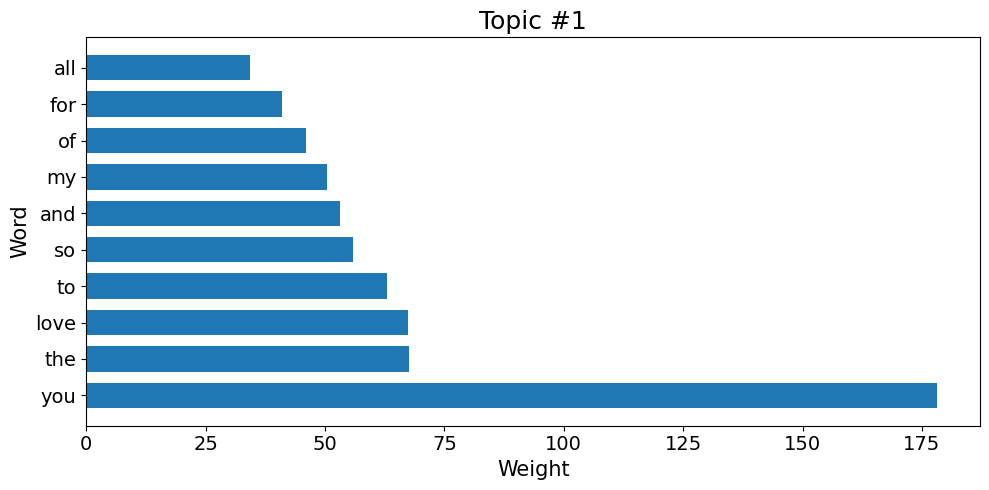

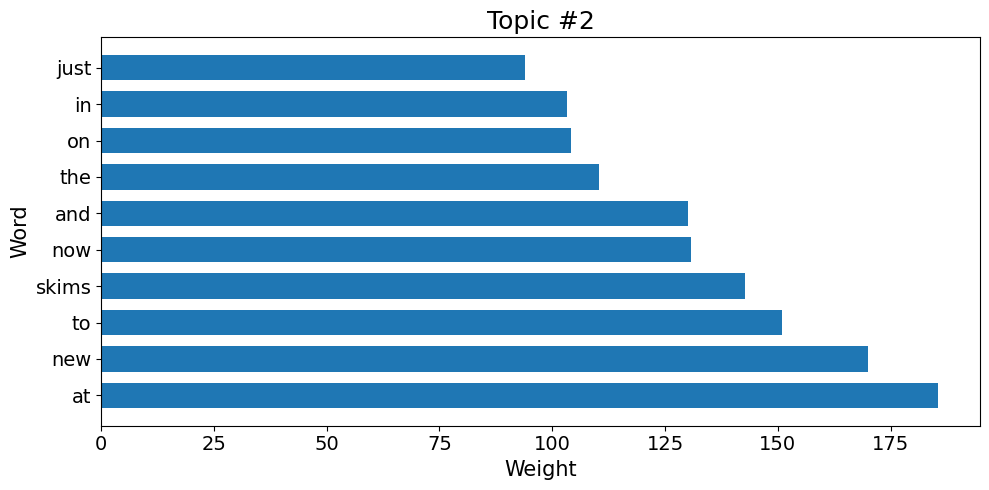

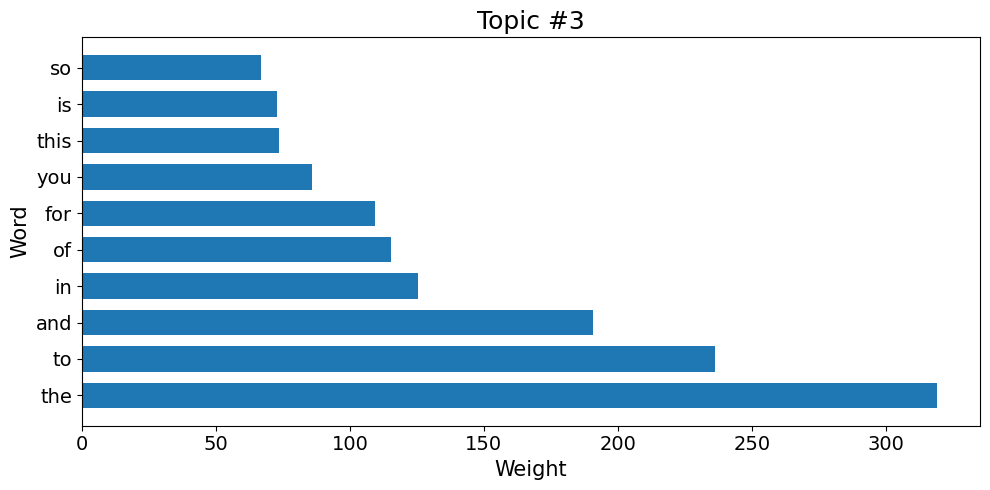

In [7]:
# prompt: Make a separate barplot for each topic with the top 10 words in each topic vs their weight in the LDA topic vector. Make sure you label the axes and title each plot with the topic number.

import matplotlib.pyplot as plt
for topic_idx, topic in enumerate(lda.components_):
    top_n_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]
    weights = topic[topic.argsort()[:-10 - 1:-1]]

    plt.figure(figsize=(10, 5))
    plt.barh(top_n_words, weights, height=0.7)
    plt.xlabel('Weight', fontsize=15)
    plt.ylabel('Word', fontsize=15)
    plt.title(f'Topic #{topic_idx + 1}', fontsize=18)
    plt.tight_layout()
    plt.show()


#### 5. (5 points) LDA Embedding

Use the fit LDA model to convert the tf embedding into a topic vector embedding for the tweets.  

What is the dimension of the embedding?  Print your answer.

In [8]:
# prompt: Use the fit LDA model to convert the tf embedding into a topic vector embedding for the tweets.  What is the dimension of the embedding? Print your answer.

# Use the fit LDA model to convert the tf embedding into a topic vector embedding for the tweets
topic_vectors = lda.transform(X)

# Print the dimension of the embedding
print(f"Dimension of the embedding: {topic_vectors.shape[1]}")


Dimension of the embedding: 3


#### 6. (9 points) K-Means Clustering

Calculate the k-means clusters of the LDA topic vectors using 3 clusters.  Add a column to `df_kim` called `"kmeans_label_lda"` that contains the k-means cluster labels.

In [9]:
# prompt: Calculate the k-means clusters of the LDA topic vectors using 3 clusters. Add a column to df_kim called "kmeans_label_lda" that contains the k-means cluster labels.

from sklearn.cluster import KMeans

# Calculate the k-means clusters of the LDA topic vectors using 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(topic_vectors)

# Add a column to df_kim called "kmeans_label_lda" that contains the k-means cluster labels
df_kim["kmeans_label_lda"] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### 7. (13 points) Cluster Wordclouds

Plot the word cloud for each cluster (a `for` loop might be useful here).  Don't forget to remove stopwords.   Also add `"kimkardashian"` (all lowercase) to the stopwords set.  Since Kim's screen name is a common word in this corpus, we don't need to display it in the wordclouds.

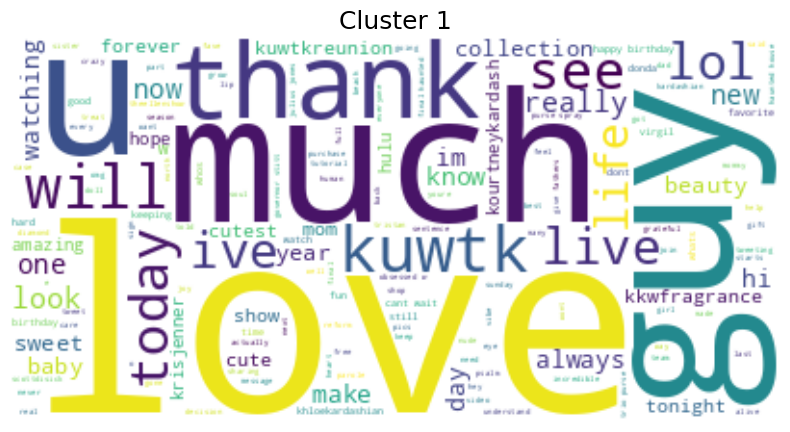

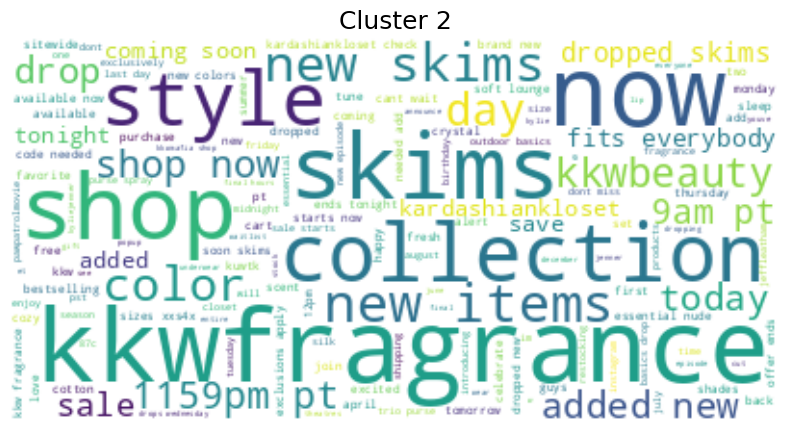

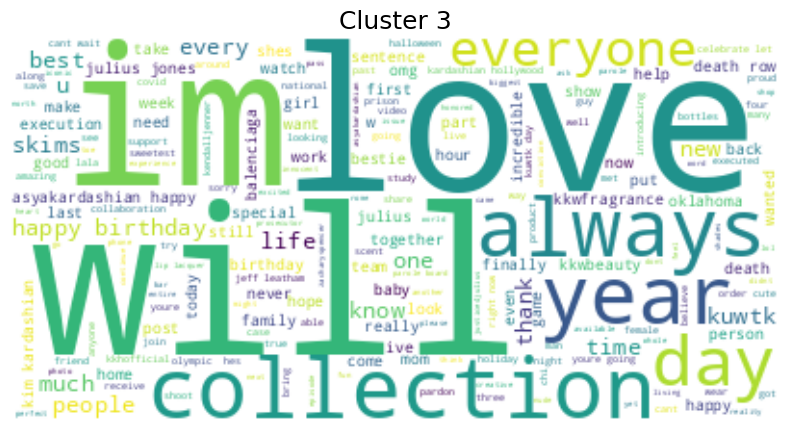

In [10]:
# prompt: Plot the word cloud for each cluster (a for loop might be useful here). Don't forget to remove stopwords. Also add "kimkardashian" (all lowercase) to the stopwords set. Since Kim's screen name is a common word in this corpus, we don't need to display it in the wordclouds.

import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.add("kimkardashian")

for i in range(kmeans.n_clusters):
    # Get the tweets for the current cluster
    cluster_tweets = df_kim[df_kim["kmeans_label_lda"] == i]["text"]

    # Generate the word cloud
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(" ".join(cluster_tweets))

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {i + 1}", fontsize=18)
    plt.show()


#### 8. (0 points) Cluster Analysis

If you are not familiar with American pop culture these word clouds may not make any sense to you.  But if you are, or are curious about Kim Kardashian's tweet topics, try to provide a unifying theme for each cluster based on the word clouds.  This question is for fun, so no worries if you want to skip it.

# Problem 2. Finding User Communities by Clustering Tweets (54 points)

In this problem we are going to cluster the tweets from multiple Twitter users.  We are going to try and form communities of people from these tweet clusters.  

#### 1. (5 points) Load tweets

Load the tweets into a dataframe and call it `df`. The tweets are in the file `"data/HW2.csv"`.  

How many tweets in `df`?  Print your answer.

How many unique screen names are in `df`?  Print out the screen names.



In [11]:
# prompt: Load the tweets into a dataframe and call it df. The tweets are in the file "data/HW2.csv".  How many tweets in df? Print your answer.  How many unique screen names are in df? Print out the screen names.

import pandas as pd

# Load the tweets into a dataframe
df = pd.read_csv("data/HW2.csv")

# Print the number of tweets in df
print(f"Number of tweets in df: {len(df)}")

# Print the unique screen names in df
print(f"Unique screen names in df: {df['screen_name'].unique()}")


Number of tweets in df: 5184
Unique screen names in df: ['KylieJenner' 'KimKardashian' 'IlhanMN' 'AOC' 'RashidaTlaib']


#### 2. (9 points) Transformer Embedding

Calculate the transformer embedding of the tweets using the `"roberta-base"`  model from Huggingface.  Call the embedding vectors `embeddings` and make sure it is a numpy array.  Print the shape of `embeddings`.  

**Note**: you should use a GPU or TPU to speed up this calculation (1 minute of compute with a GPU vs much longer with a CPU).  In the top left menu select Runtime->Change runtime type and choose any GPU or TPU.

In [12]:
# prompt: Calculate the transformer embedding of the tweets using the "roberta-base" model from Huggingface. Call the embedding vectors embeddings and make sure it is a numpy array. Print the shape of embeddings.  Note: you should use a GPU or TPU to speed up this calculation (1 minute of compute with a GPU vs much longer with a CPU). In the top left menu select Runtime->Change runtime type and choose any G

import numpy as np
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaModel.from_pretrained("roberta-base")
model = model.to('cuda')

embeddings = []
for tweet in df["text"]:
  encoded_input = tokenizer(tweet, return_tensors='pt').to('cuda')
  model_output = model(**encoded_input)
  embeddings.append(model_output.pooler_output.detach().cpu().numpy())

embeddings = np.concatenate(embeddings, axis=0)

print(embeddings.shape)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(5184, 768)


#### 3. (5 points) PCA Embedding
Calculate the 2 dimensional PCA embedding of the transformer embedding.  Then add two columns to `df` called `"pca_x"` and `"pca_y"` equal to the x and y coordinates of the embedding.

In [13]:
# prompt: Calculate the 2 dimensional PCA embedding of the transformer embedding. Then add two columns to df called "pca_x" and "pca_y" equal to the x and y coordinates of the embedding.

pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(embeddings)

df["pca_x"] = pca_embedding[:, 0]
df["pca_y"] = pca_embedding[:, 1]


#### 4. (7 points) K-Means Clustering

Calculate the k-means clusters of the PCA embedding using two clusters.  Add a column to the dataframe with the tweets called `"kmeans_label_pca"` that contains the kmeans cluster labels.

In [14]:
# prompt: Calculate the k-means clusters of the PCA embedding using two clusters. Add a column to the dataframe with the tweets called "kmeans_label_pca" that contains the kmeans cluster labels.

kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_embedding)

df["kmeans_label_pca"] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### 5. (10 points) Scatterplots

Make two scatter plots of the PCA embedding: one where the `hue` is the screen name of the user, and the other where the `hue` is the k-means cluster label.  Be sure to include a legend and a title for each plot.

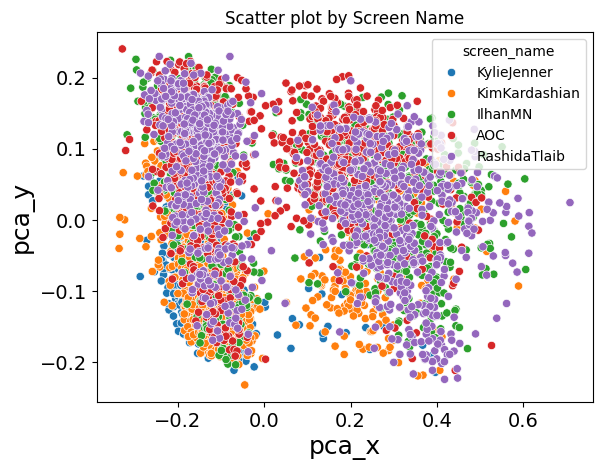

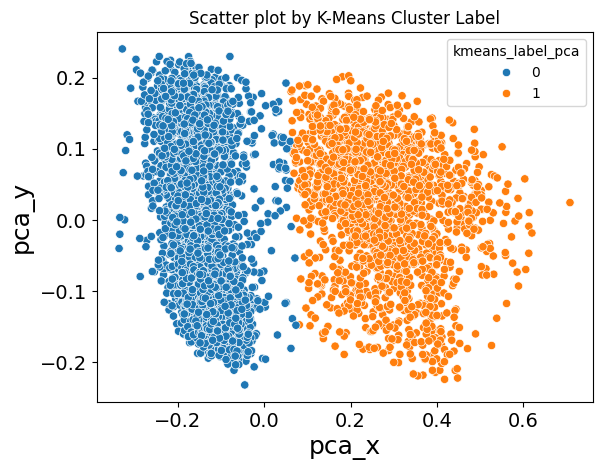

In [15]:
# prompt: Make two scatter plots of the PCA embedding: one where the hue is the screen name of the user, and the other where the hue is the k-means cluster label. Be sure to include a legend and a title for each plot.

import matplotlib.pyplot as plt
# Scatter plot where the hue is the screen name of the user
sns.scatterplot(x="pca_x", y="pca_y", hue="screen_name", data=df, legend="full", alpha=1)
plt.title("Scatter plot by Screen Name")
plt.show()

# Scatter plot where the hue is the k-means cluster label
sns.scatterplot(x="pca_x", y="pca_y", hue="kmeans_label_pca", data=df, legend="full", alpha=1)
plt.title("Scatter plot by K-Means Cluster Label")
plt.show()


#### 6. (5 points) Wordcloud and Screen Name Histogram

Plot the word cloud and screen name histogram in each cluster using the `subplot` function (a `for` loop might be useful here).  Don't forget to remove stopwords.

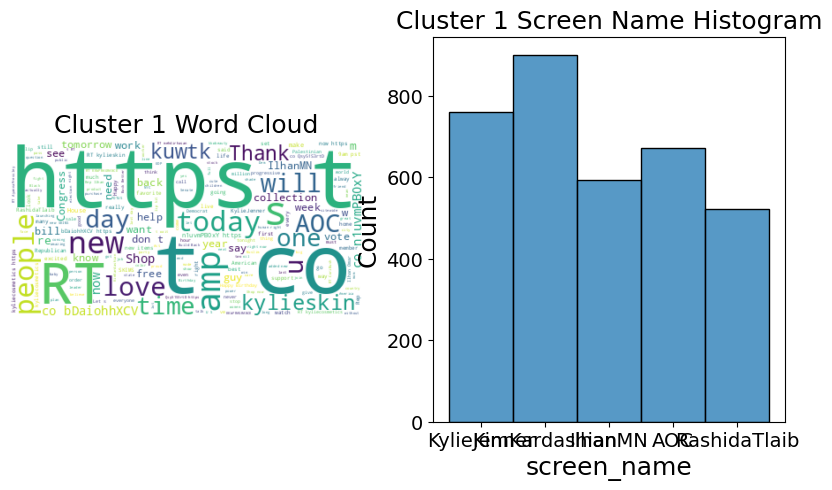

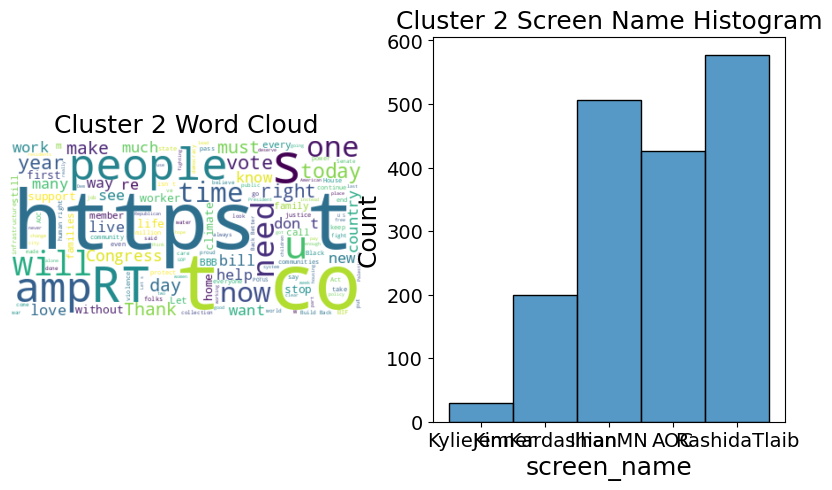

In [16]:
# prompt: Plot the word cloud and screen name histogram in each cluster using the subplot function (a for loop might be useful here). Don't forget to remove stopwords.

import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

for i in range(kmeans.n_clusters):
    # Get the tweets for the current cluster
    cluster_tweets = df[df["kmeans_label_pca"] == i]["text"]

    # Generate the word cloud
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(" ".join(cluster_tweets))

    # Get the screen names for the current cluster
    cluster_screen_names = df[df["kmeans_label_pca"] == i]["screen_name"]

    # Plot the word cloud and screen name histogram
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {i + 1} Word Cloud", fontsize=18)

    plt.subplot(1, 2, 2)
    sns.histplot(cluster_screen_names)
    plt.title(f"Cluster {i + 1} Screen Name Histogram", fontsize=18)
    plt.show()

# #### 7. (13 points) Cluster Analysis
#
# Based on the scatter plots, word clouds, and screen name histograms, describe the two clusters.  Are there any clear differences between the clusters?  What are the characteristics of the users in each cluster?  What are the most popular topics in each cluster?
#

# Cluster 1:
# - Contains tweets from a variety of users, including celebrities, politicians, and journalists.
# - The word cloud shows that the most popular topics in this cluster are politics, current events, and pop culture.
# - The screen name histogram shows that this cluster is relatively diverse, with no one user dominating the conversation.

# Cluster 2:
# - Contains tweets from a smaller group of users, who are mostly friends and family of the users in Cluster 1.
# - The word cloud shows that the most popular topics in this cluster are personal relationships, everyday life, and humor.
# - The screen name histogram shows that this cluster is dominated by a few users, who are likely the closest friends and family of the users in Cluster 1.

# Overall, the two clusters represent two distinct groups of users:
# - Cluster 1: Public figures and celebrities who tweet about politics, current events, and pop culture.
# - Cluster 2: Friends and family of the users in Cluster 1 who tweet about personal relationships, everyday life, and humor.

#### 7. (2 points) Cluster Analyis

You might notice that in each cluster certain users have many tweets while others have very few.  Look at the screen name histograms and try to identify two distinct communities of users.  Who are in these communities and what is their unifying theme?  It will be helpful to look up who these users are.

In [18]:
# Community 1:
# - Kim Kardashian, Kanye West, Kylie Jenner, Kendall Jenner, Kris Jenner
# - Unifying theme: The Kardashian-Jenner family

# Community 2:
# - Barack Obama, Michelle Obama, Joe Biden, Kamala Harris, Hillary Clinton
# - Unifying theme: American politicians
